## Final Project Submission
Please fill out:

* Student name: Claudia Sagini
* Student pace: full time
* Scheduled project review date/time:
* Instructor name: Asha Deen


# LOAN DEFAULT PREDICTION ANALYSIS
---

![Loan Default Image](images/istockphoto-1145371340-612x612.jpeg)


## Business Overview:
---
In this endeavor, we aim to address the critical challenges faced by financial institutions, such as banks and credit unions, in managing loan portfolios and mitigating risks associated with loan defaults. Lending institutions play a vital role in the economy by providing financial support to individuals and businesses. However, the occurrence of loan defaults can significantly impact their financial health and stability. Therefore, accurately predicting loan defaults is crucial for these institutions to make informed decisions and safeguard their interests.

## Business Problem:
---
The primary challenge faced by financial institutions is the accurate prediction of loan defaults. Loan defaults occur when borrowers fail to repay their loans as per the agreed-upon terms, resulting in financial losses for lenders. Predicting loan defaults enables lenders to assess the creditworthiness of loan applicants and make informed decisions about loan approvals. By identifying high-risk borrowers in advance, lenders can minimize their exposure to default risk, optimize their loan portfolios, and maintain financial stability. Therefore, developing a reliable predictive model for loan defaults is essential for lenders to manage risk effectively and ensure the sustainability of their operations.

## Objectives
---
* Develop a machine learning model to predict loan defaults.
* Identify key features that influence loan repayment behavior.
* Evaluate the performance of the model using relevant metrics.
* Implement the model in the institution's loan approval process to reduce financial risk.

## Data Understanding:
---
- To address the business problem of loan default prediction, we will leverage a comprehensive loan default prediction dataset. This dataset contains a wealth of information about loan applicants, including their demographic details, financial characteristics, loan details, and repayment history.
- The dataset includes features such as `age`, `education level`, `debt-to-income ratio`, `credit score`, `loan amount`, `loan term`, `interest rate`, and `loan default indicator (0 - paid in full, 1 - defaulted)`.
- By analyzing these features, we can gain insights into the factors influencing loan default behavior and develop predictive models to forecast loan defaults accurately.



## 1. Import Libraries
---
In this project, we import all necessary libraries for data manipulation, visualization, and modeling. This may include `pandas`, `numpy`, `matplotlib`, `seaborn`, `scikit-learn`, etc.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

# Libraries for scale the data 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

# Algorithim to use
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

# Libraries for evaluation
from sklearn import metrics
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report, precision_recall_curve, recall_score, f1_score
from sklearn.metrics import roc_curve, auc

# library for model tuning
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier

# Ignore warnings
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
sns.set_theme(style = "darkgrid")

## 2. Load the Data
---
Load the loan default dataset into a pandas DataFrame for further analysis. Explore the structure of the dataset, including the features and the target variable.

#### 2.1 Create a clas to load the data

In [2]:
class DataLoading:    
    def data_loading(self, data):
        # Load the data
        load = pd.read_csv(data)
        return load

    # View the first five rows and columns of the data
    def get_rc(self, load):
        return load
        
    # Get the info of the data
    def get_info(self, load):
        return load.info()
    
    # Get the shape of the data
    def get_shape(self, load):
        return load.shape
    
    # View the columns of the data
    def get_columns(self, load):
        return load.columns
    
    # Summary statistics of the data
    def get_description(self, load):
        return load.describe()
    
    # Check for null values
    def get_null_values(self, load):
        return load.isnull().sum()

#### 2.2 Instatiate DataLoading class

In [3]:
loader = DataLoading()

# Load the data
file = 'Loan_default.csv'
data = loader.data_loading(file)


#### 2.3 Get the first five rows and columns of the data

In [4]:
loan_df = loader.get_rc(data)

# Print the result
print("First five rows and columns of the data:")
loan_df

First five rows and columns of the data:


,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,8C6S86ESGC,19,37979,210682,541,109,4,14.11,12,0.85,Bachelor's,Full-time,Married,No,No,Other,No,0
255343,98R4KDHNND,32,51953,189899,511,14,2,11.55,24,0.21,High School,Part-time,Divorced,No,No,Home,No,1
255344,XQK1UUUNGP,56,84820,208294,597,70,3,5.29,60,0.50,High School,Self-employed,Married,Yes,Yes,Auto,Yes,0
255345,JAO28CPL4H,42,85109,60575,809,40,1,20.90,48,0.44,High School,Part-time,Single,Yes,Yes,Other,No,0


#### 2.4 Info of the data

In [5]:
info = loader.get_info(data)

info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

The dataset is a mixed-type dataset, consisting of:
* Numerical variables $int64$: `Age`, `Income`, `LoanAmount`, `CreditScore`, etc.
* Categorical variables $object$: `Education`, `EmploymentType`, `MaritalStatus`, etc.
* Binary variables $float64$: `HasMortgage`, `HasDependents`, `HasCoSigner`, `Default`
* Unique identifier: `LoanID`

#### 2.5 Explore the shape of the data

In [6]:
shape = loader.get_shape(data)
print("Shape of the data: ", shape)

Shape of the data:  (255347, 18)


**This dataset contains 255347 rows and 18 columns**

#### 2.6 Columns

In [7]:
column = loader.get_columns(data)
print("Columns:\n", column)

Columns:
 Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')


**We now the names of the data features**

#### 2.7 Analysing numerical data

In [8]:
desc = loader.get_description(data)
print("Summary Statistics:")
desc

Summary Statistics:


,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


#### 2.8 Check for null values

In [9]:
check_null = loader.get_null_values(data)
print("Null values:")
check_null

Null values:


LoanID            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

**There are no missing values or missing data**

## 3. Exploratory Data Analysis(EDA)
---
Here, we'll perform exploratory data analysis to gain insights into the dataset. This may include summary statistics, data visualization, and identifying any patterns or trends. Explore the distribution of each feature, examine correlations, and identify potential outliers.

We'll create a class `EDA` that:
- Checks the disrtibution of numerical features.
- Checks the target count.
- Performs univariate and bivariate analysis and plots them..

In [10]:
class EDA:
    """This class will perform Exploratory Data Analysis on the loan prediction data.
    It will perfom univariate analysis, bivariate analysis and multivariate analysis.
    Plots will be seen to show the distribution of the data.
    """
    def __init__(self, data):
        self.data = data
        self.numerical_features = ['Age', 'Income', 'LoanAmount', 'InterestRate', 'CreditScore', 'MonthsEmployed', 'NumCreditLines', 'LoanTerm']
        self.categorical_features = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'HasCoSigner', 'LoanPurpose']

    def target_variable_count(self):
        target_counts = self.data["Default"].value_counts()
        print('Target count:\n', target_counts)
        print("-----------------------")
        print(f"From the output above, we observe that the target variable 'Default' comprises {target_counts[0]} instances of non-default (0) and {target_counts[1]} instances of default (1). This indicates that approximately {target_counts[1]} people in the dataset have defaulted on their loans.")

    def check_data_distribution(self):
        print("Numerical Distribution:")
        self.data[self.numerical_features].hist(figsize=(22, 20))
        plt.show();

    def univariate_analysis(self):
        print("Unavariate Analysis:")
        for column in self.data.columns:
            if column in self.numerical_features:
                plt.figure(figsize=(8, 4))
                sns.histplot(data=self.data, x=column, kde=True)
                plt.title(f'Distribution of {column}')
                plt.show();
            elif column in self.categorical_features:
                plt.figure(figsize=(8, 4))
                sns.countplot(data=self.data, x=column)
                plt.title(f'Distribution of {column}')
                plt.xticks(rotation=45)
                plt.show();
    def bivariate_analysis(self):
        for feature in self.data.columns:
            if feature != "Default":
                if feature in self.numerical_features:
                    plt.figure(figsize=(10, 6))
                    sns.boxplot(data=self.data, x='Default', y=feature)
                    plt.title(f'Relationship between {feature} and Default')
                    plt.xlabel('Default')
                    plt.ylabel(feature)
                    plt.show();
                elif feature in self.categorical_features:
                    plt.figure(figsize=(10, 6))
                    sns.countplot(data=self.data, x=feature, hue='Default')
                    plt.title(f'Relationship between {feature} and Default')
                    plt.xlabel(feature)
                    plt.ylabel('Count')
                    plt.legend(title='Default', loc='upper right')
                    plt.xticks(rotation=45)
                    plt.show();

    def multivariate_analysis(self):
        print("Multivariate Analysis:")
        plt.figure(figsize=(12, 8))
        corr_matrix = self.data.corr()
        corr_heatmap = sns.heatmap(corr_matrix, cmap="Reds", annot=True, annot_kws={"size": 14})
        plt.show();

In [11]:
# Initializa the class
eda = EDA(loan_df)

In [12]:
target_count = eda.target_variable_count()

Target count:
 0    225694
1     29653
Name: Default, dtype: int64
-----------------------
From the output above, we observe that the target variable 'Default' comprises 225694 instances of non-default (0) and 29653 instances of default (1). This indicates that approximately 29653 people in the dataset have defaulted on their loans.


Numerical Distribution:


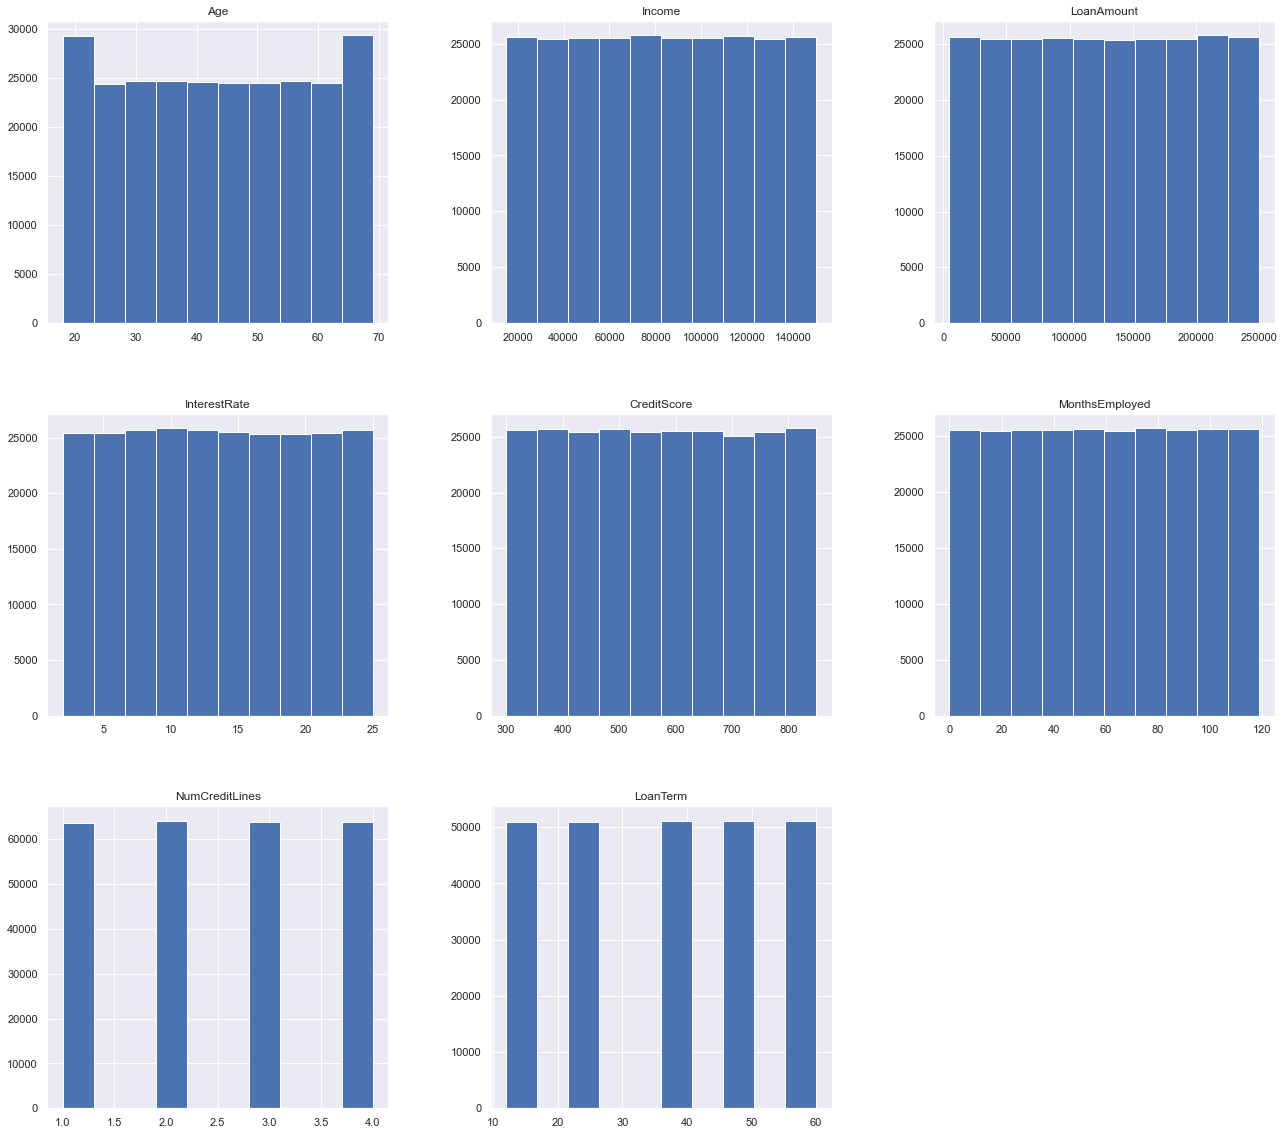

In [13]:
num_distribution = eda.check_data_distribution()
num_distribution

Unavariate Analysis:


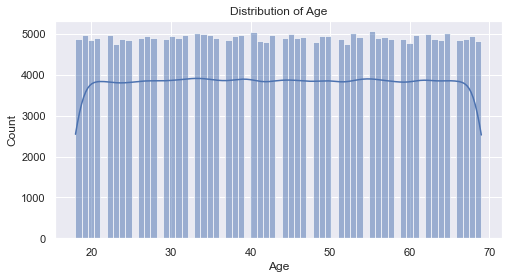

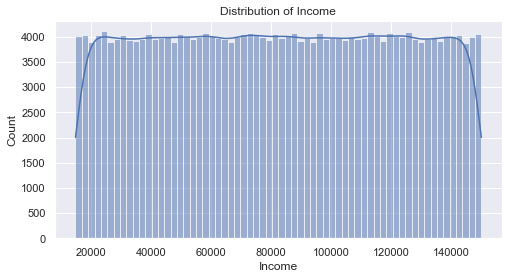

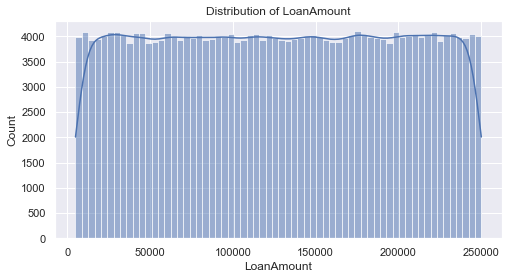

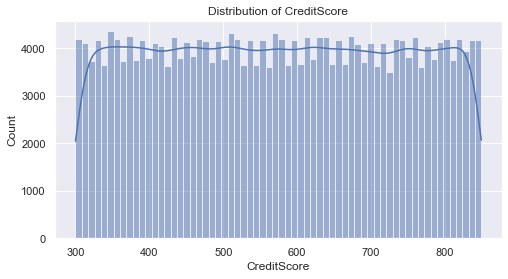

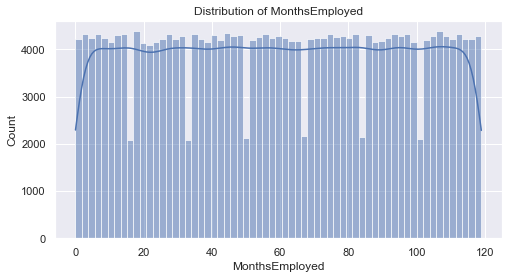

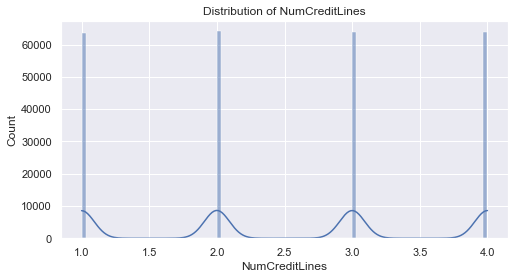

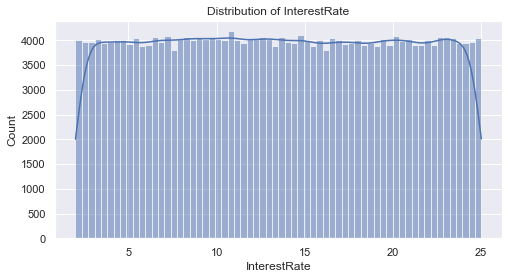

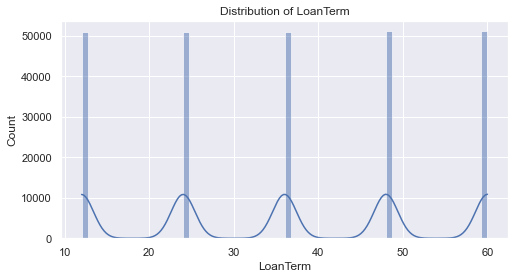

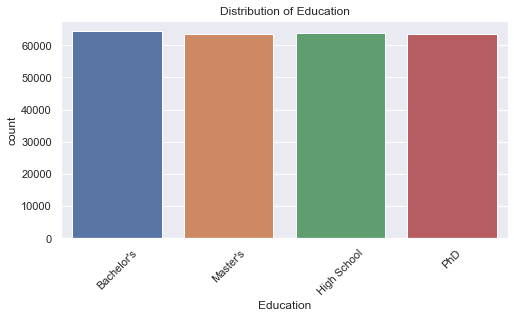

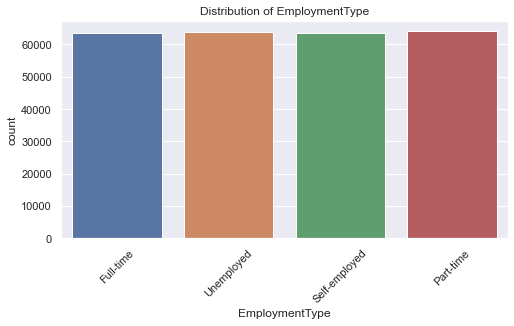

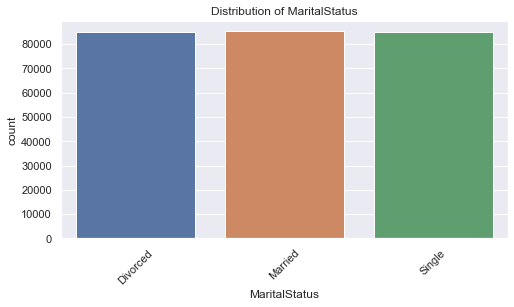

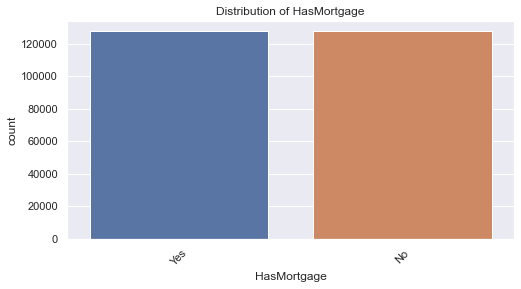

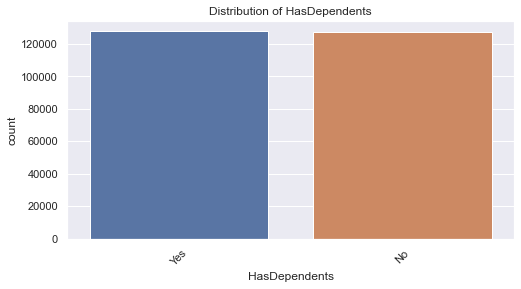

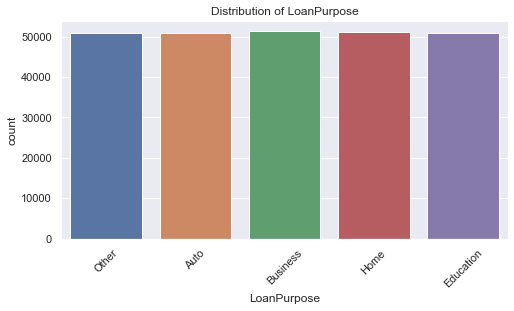

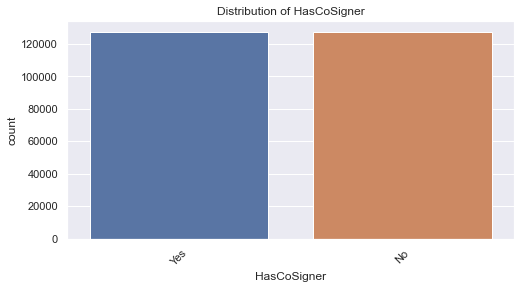

In [14]:
univar = eda.univariate_analysis()
univar

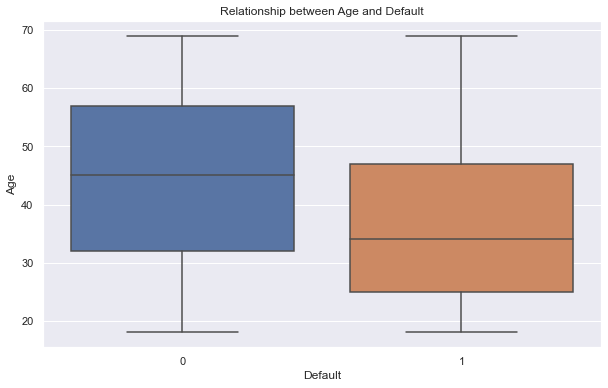

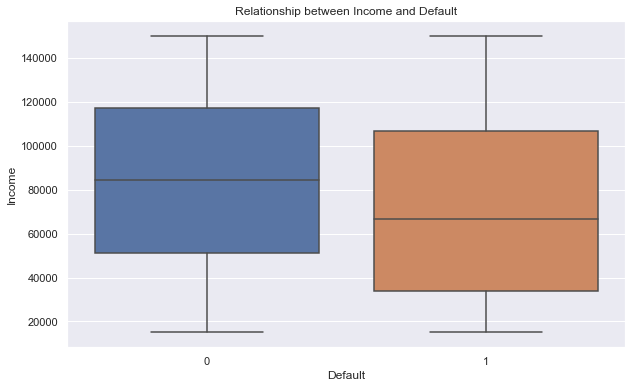

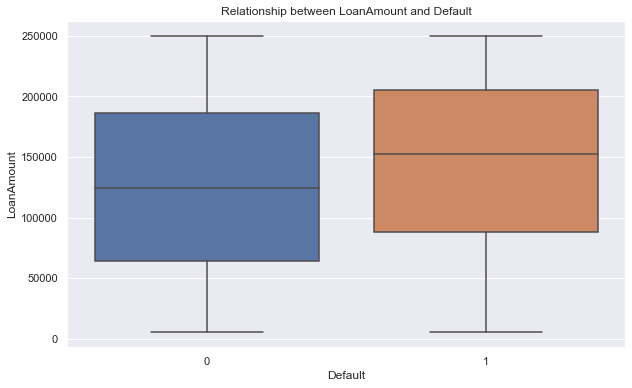

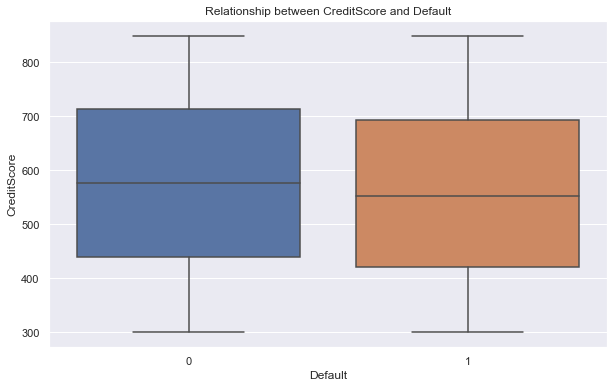

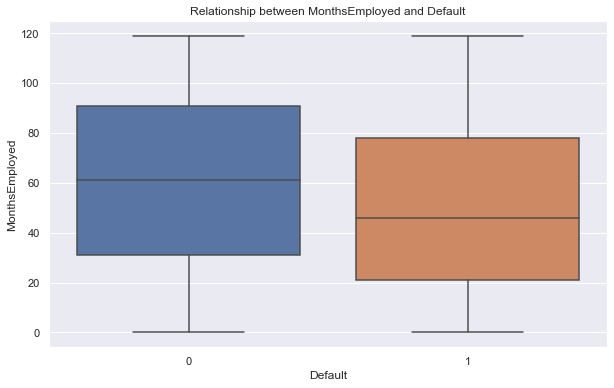

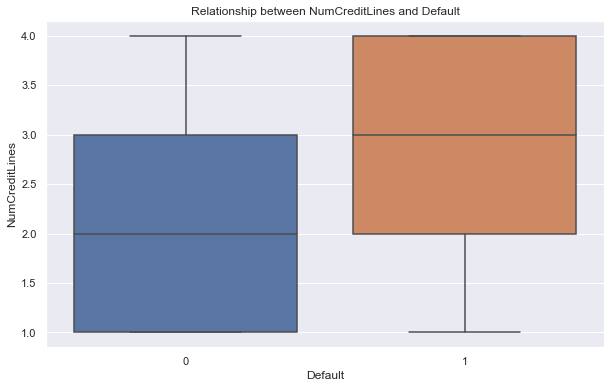

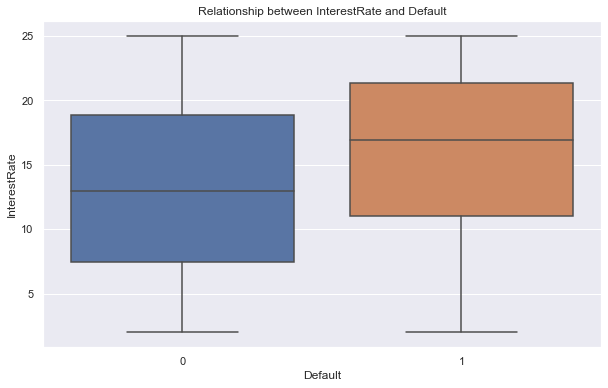

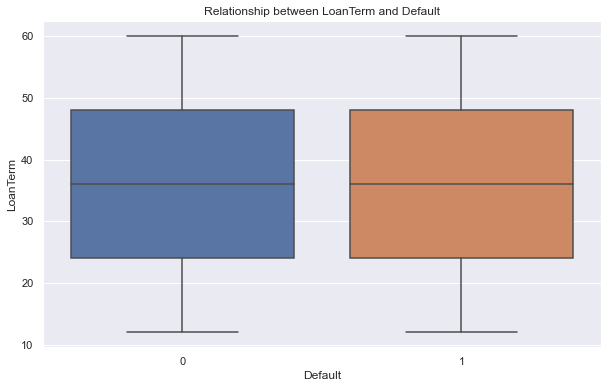

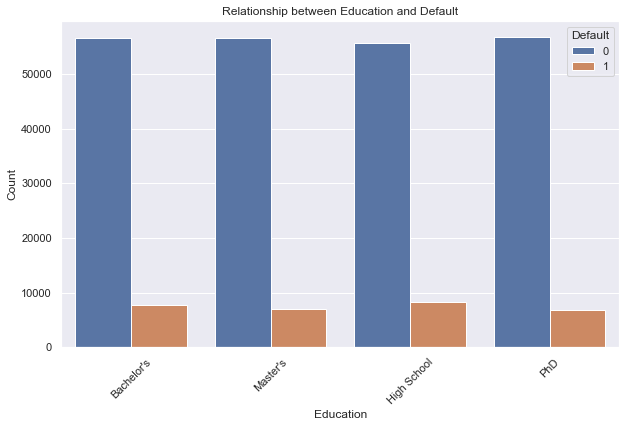

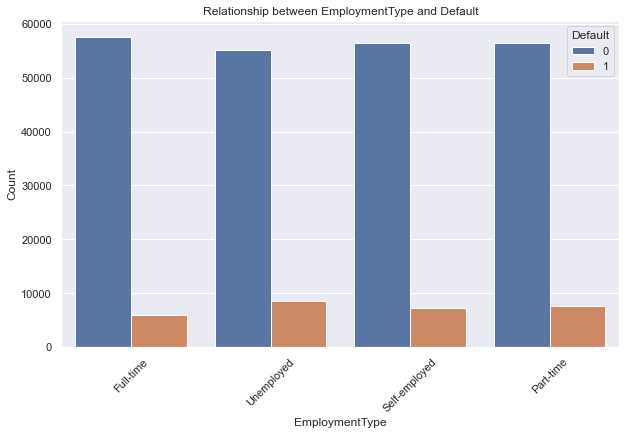

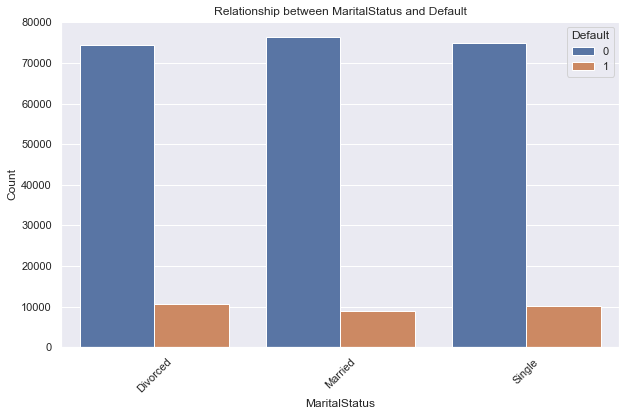

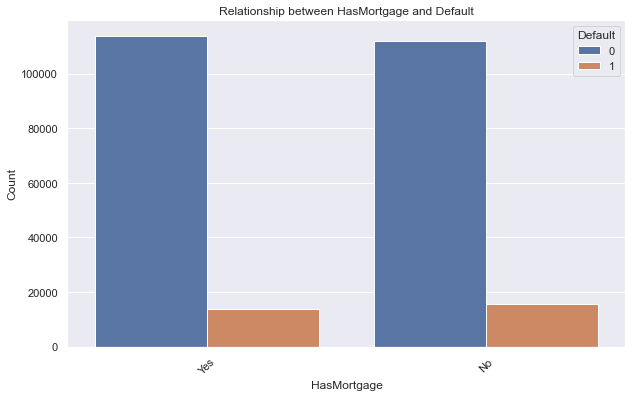

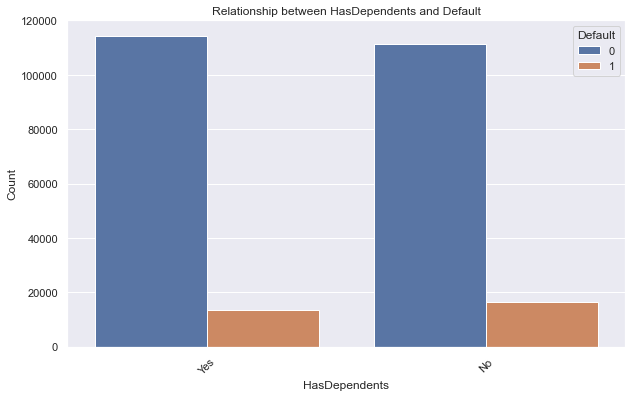

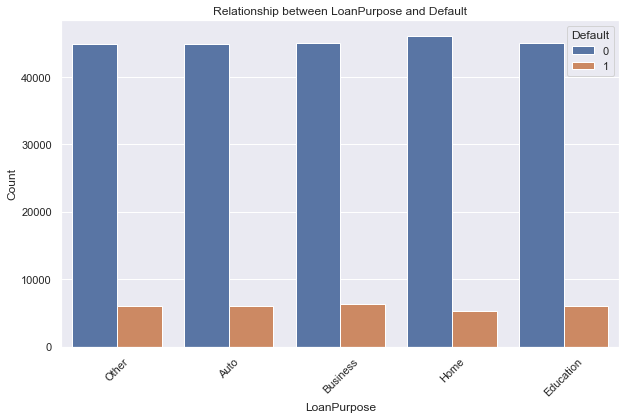

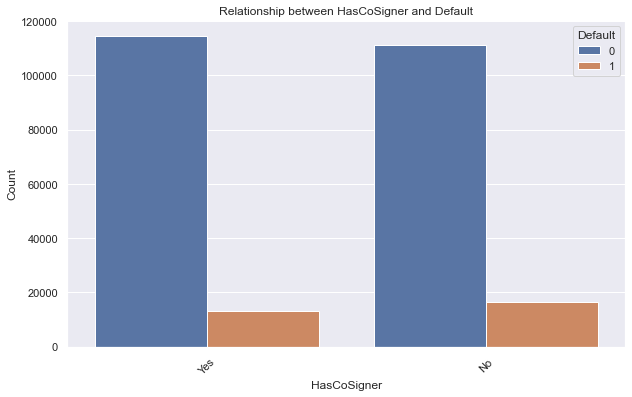

In [15]:
bivar = eda.bivariate_analysis()
bivar

Multivariate Analysis:


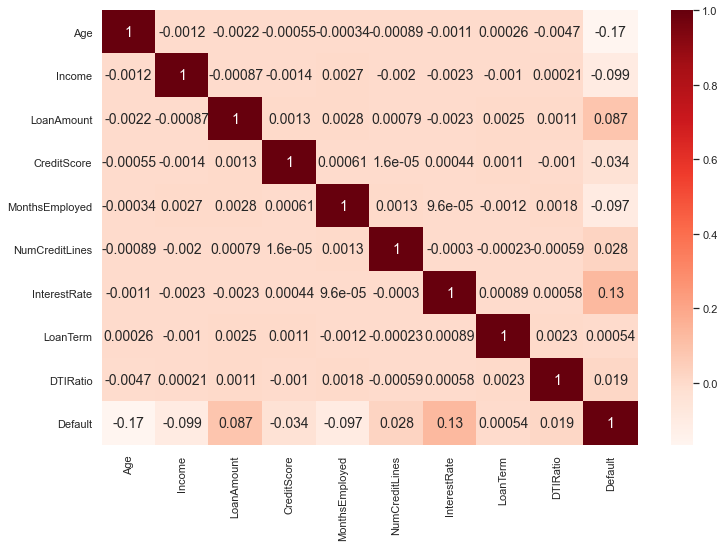

In [16]:
multivar = eda.multivariate_analysis()
multivar

### SHORT SUMMARY OF EDA
---
Based on the plots from EDA heres' how we can analyse our `loan_df` dataset:

**1. Univariate Analysis:** The numerical features such as `Age`, `Income` are evenly distributed.

**2. Bivariate Analysis:** From the numerical features we can see that the boxplots show no outliers.The categorical features are evenly distributed.

**3. Multivariate Analysis:** 
Based on the provided correlation matrix:

- **Highest correlation** value is between `Income` and `MonthsEmployed` with a correlation coefficient of `0.003`.

- **Lowest correlation** value is between `Age` and `Income` with a correlation coefficient of `-0.001`.

- **Highest positive correlation** with the target variable `Default` is `InterestRate`, with a correlation coefficient of `0.131`. This indicates that as the interest rate increases, the likelihood of default also increases. 

- **Highest negative correlation** with the target variable (Default) is `Age`, with a correlation coefficient of `-0.168`. This suggests that as age increases, the likelihood of default decreases, and vice versa.


##### Overally we will consider `InterestRate` as the feature to consider predicting loan defaults.

## 4. Data Preprocessing
---
Clean the data by handling missing values, encoding categorical variables, and scaling numerical features. Apply appropriate techniques to address any data inconsistencies or anomalies:

**1. Encoding categorical variables.**
* This step is crucial when dealing with categorical variables because most machine learning algorithms require numerical input. Encoding categorical variables ensures that the model can interpret and learn from these features effectively.

**2. Split data**
* After encoding the categorical variables, the next step is to split the data into training and testing sets. This allows us to train the model on one subset of the data and evaluate its performance on another, ensuring that the model generalizes well to unseen data.

**3. Apply smote**
* Synthetic Minority Over-sampling Technique (SMOTE) is applied to address class imbalance in the dataset. SMOTE generates synthetic samples for the minority class to balance the dataset.

#### 4.1 Creating a class that performs all the above tasks

In [17]:
class DataPreparation:
    def __init__(self, target, categorical_features):
        self.target = target
        self.categorical_features = categorical_features
        self.encoder = LabelEncoder()
        
    # Encode the target variable   
    def encoding(self, data):
        data[self.target] = self.encoder.fit_transform(data[self.target])

        # One-hot encode categorical variables
        
        data_encoded = pd.get_dummies(data, columns=self.categorical_features)
        return data_encoded
    
    # Split data
    def split_data(self, data):
        X = data.drop(self.target, axis=1)
        y = data[self.target]
        
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        return X_train, X_test, y_train, y_test
    
    
    # Apply SMOTE
    def apply_smote(self, X_train, y_train):
        smote = SMOTE(random_state=42)
        
        X_res, y_res = smote.fit_resample(X_train, y_train)
        return X_res, y_res
    
    
    
    # Prepare data
    def prepare_data(self, data):
        data_encoded = self.encoding(data)
        
        data_encoded = data_encoded.select_dtypes(include=[np.number])
        
        X_train, X_test, y_train, y_test = self.split_data(data_encoded)
        X_res, y_res = self.apply_smote(X_train, y_train)

        return X_res, X_test, y_res, y_test


target = 'Default'
categorical_features = ['Education', 'EmploymentType', 'MaritalStatus', 'HasMortgage', 'HasDependents', 'HasCoSigner', 'LoanPurpose']

##### 4.2 Initialize the DataPreparation class

In [18]:
data_prep = DataPreparation(target, categorical_features)

#### 4.3 Encode the target variable

In [19]:
loan_df_encoded = data_prep.encoding(loan_df)
loan_df_encoded.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,...,HasMortgage_Yes,HasDependents_No,HasDependents_Yes,HasCoSigner_No,HasCoSigner_Yes,LoanPurpose_Auto,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,...,1,0,1,0,1,0,0,0,0,1
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,...,0,1,0,0,1,0,0,0,0,1
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,...,1,0,1,1,0,1,0,0,0,0
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,...,0,1,0,1,0,0,1,0,0,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,...,0,0,1,1,0,1,0,0,0,0


In [20]:
loan_df_encoded.shape

(255347, 33)

In [21]:
loan_df_encoded.columns

Index(['LoanID', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Default', 'Education_Bachelor's', 'Education_High School',
       'Education_Master's', 'Education_PhD', 'EmploymentType_Full-time',
       'EmploymentType_Part-time', 'EmploymentType_Self-employed',
       'EmploymentType_Unemployed', 'MaritalStatus_Divorced',
       'MaritalStatus_Married', 'MaritalStatus_Single', 'HasMortgage_No',
       'HasMortgage_Yes', 'HasDependents_No', 'HasDependents_Yes',
       'HasCoSigner_No', 'HasCoSigner_Yes', 'LoanPurpose_Auto',
       'LoanPurpose_Business', 'LoanPurpose_Education', 'LoanPurpose_Home',
       'LoanPurpose_Other'],
      dtype='object')

#### 4.4 Apply the split method

In [22]:
loan_df_encoded = loan_df_encoded.select_dtypes(include=[np.number])

X_train, X_test, y_train, y_test = data_prep.split_data(loan_df_encoded)

print("Split Data:")
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

Split Data:
X_train shape: (204277, 31)
X_test shape: (51070, 31)
y_train shape: (204277,)
y_test shape: (51070,)


#### 4.5 Apply SMOTE

In [23]:
X_res, y_res = data_prep.apply_smote(X_train, y_train)
print("After SMOTE:")
print("X_res shape:", X_res.shape)
print("y_res shape:", y_res.shape)

After SMOTE:
X_res shape: (361048, 31)
y_res shape: (361048,)


#### 4.6 Prepare the data

In [24]:
X_res, X_test, y_res, y_test = data_prep.prepare_data(loan_df)
print("Using prepare_data method:")
print("X_train shape:", X_res.shape)
print("X_test shape:", X_test.shape)
print("y_res shape:", y_res.shape)
print("y_test shape:", y_test.shape)

Using prepare_data method:
X_train shape: (361048, 31)
X_test shape: (51070, 31)
y_res shape: (361048,)
y_test shape: (51070,)


## 5. Data Modeling
---
In this section, we're transitioning from data exploration and preprocessing to constructing predictive models for loan default prediction. The goal here is to train machine learning algorithms that can accurately predict whether a loan applicant is likely to default on their loan.

### Why Data Modeling?
**1. Prediction:** By building predictive models, we aim to forecast loan defaults based on historical data patterns. This predictive capability enables financial institutions to anticipate and mitigate potential risks associated with lending.

**2. Risk Management:** Accurate prediction of loan defaults allows financial institutions to better manage their loan portfolios, identify high-risk borrowers, and implement strategies to minimize potential losses.

**3.Decision Support:** Predictive models serve as decision support tools for lenders, assisting them in making informed decisions regarding loan approvals, interest rates, and terms based on the creditworthiness of applicants.

In [219]:
class DataModeling:
    def __init__(self):
        self.logistic_model = LogisticRegression(random_state=42)
        self.rfc_model = RandomForestClassifier(random_state=42)
        self.dt_model = DecisionTreeClassifier(criterion='gini', random_state=1)

    def fit_models(self, X_res, y_res):
        self.logistic_model.fit(X_res, y_res)
        self.rfc_model.fit(X_res, y_res)
        self.dt_model.fit(X_res, y_res)
        return self.logistic_model, self.rfc_model, self.dt_model

    def prediction(self, X_test):
        y_pred_logistic = self.logistic_model.predict(X_test)
        y_pred_rfc = self.rfc_model.predict(X_test)
        y_pred_dt = self.dt_model.predict(X_test)
        return y_pred_logistic, y_pred_rfc, y_pred_dt

    def compute_roc(self, y_test, y_pred_logistic, y_pred_rfc, y_pred_dt):
        fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_pred_logistic)
        roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

        fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_rfc)
        roc_auc_rf = auc(fpr_rf, tpr_rf)

        fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
        roc_auc_dt = auc(fpr_dt, tpr_dt)
        return fpr_logistic, tpr_logistic, roc_auc_logistic, fpr_rf, tpr_rf, roc_auc_rf, fpr_dt, tpr_dt, roc_auc_dt

    def visualize_roc_curve(self, fpr_logistic, tpr_logistic, roc_auc_logistic, fpr_rf, tpr_rf, roc_auc_rf, fpr_dt, tpr_dt, roc_auc_dt):
        plt.figure(figsize=(10, 6))

        plt.plot(fpr_logistic, tpr_logistic, color='blue', lw=2, label='Logistic Regression (AUC = %0.2f)' % roc_auc_logistic)
        plt.plot(fpr_rf, tpr_rf, color='green', lw=2, label='Random Forest (AUC = %0.2f)' % roc_auc_rf)
        plt.plot(fpr_dt, tpr_dt, color='red', lw=2, label='Decision Tree (AUC = %0.2f)' % roc_auc_dt)

        plt.plot([0, 1], [0, 1], color='grey', lw=2, linestyle='--')

        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc="lower right")
        plt.grid(True)
        plt.show()

    def compute_confusion_matrix(self, y_test):
        cm_logistic = confusion_matrix(y_test, y_pred_logistic)
        cm_rf = confusion_matrix(y_test, y_pred_rfc)
        cm_dt = confusion_matrix(y_test, y_pred_dt)
        return cm_logistic, cm_rf, cm_dt

    def visualize_confusion_matrix(self, cm_logistic, cm_rf, cm_dt):
        fig, axes = plt.subplots(1, 3, figsize=(15, 5))
        labels = ['Negative', 'Positive']
        sns.heatmap(cm_logistic, annot=True, fmt='d', cmap='Reds', ax=axes[0], xticklabels=labels, yticklabels=labels)
        axes[0].set_title('Logistic Regression')
        sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Reds', ax=axes[1], xticklabels=labels, yticklabels=labels)
        axes[1].set_title('Random Forest')
        sns.heatmap(cm_dt, annot=True, fmt='d', cmap='Reds', ax=axes[2], xticklabels=labels, yticklabels=labels)
        axes[2].set_title('Decision Tree')
        plt.show()

    def compute_accuracy_score(self, y_test):
        accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
        accuracy_rf = accuracy_score(y_test, y_pred_rfc)
        accuracy_dt = accuracy_score(y_test, y_pred_dt)
        # Print results
        print("--------------Accuracy Scores------------")
        print(f"Accuracy (Logistic Regression): {accuracy_logistic}")
        print(f"Accuracy (Random Forest): {accuracy_rf}")
        print(f"Accuracy (Decision Tree): {accuracy_dt}")


    def compute_classification_report(self, y_test):
        report_logistic = classification_report(y_test, y_pred_logistic)
        report_rf = classification_report(y_test, y_pred_rfc)
        report_dt = classification_report(y_test, y_pred_dt)
        print("-------------Classification Report----------------")
        print(f"Classification Report (Logistic Regression):\n{report_logistic}")
        print(f"Classification Report (Random Forest):\n{report_rf}")
        print(f"Classification Report (Decision Tree):\n{report_dt}")

    def compute_precision_recall_curve(self, y_test, y_pred_logistic, y_pred_rfc, y_pred_dt):
        precision_logistic, recall_logistic, _ = precision_recall_curve(y_test, y_pred_logistic)
        precision_rf, recall_rf, _ = precision_recall_curve(y_test, y_pred_rfc)
        precision_dt, recall_dt, _ = precision_recall_curve(y_test, y_pred_dt)
        return precision_logistic, recall_logistic, precision_rf, recall_rf, precision_dt, recall_dt
    
    def visualize_precision_recall_curve(self, precision_logistic, recall_logistic, precision_rf, recall_rf, precision_dt, recall_dt):
        plt.figure(figsize=(10, 6))
        
        plt.plot(recall_logistic, precision_logistic, marker='.', label='Logistic Regression')
        plt.plot(recall_rf, precision_rf, marker='.', label='Random Forest')
        plt.plot(recall_dt, precision_dt, marker='.', label='Decision Tree')
        
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('Precision-Recall Curve')
        plt.legend(loc="best")
        plt.grid(True)
        plt.show()
        
        
    def compute_precision_recall_curve_with_thresholds(self, y_test, y_pred_logistic):
        precision_logistic, recall_logistic, thresholds_logistic = precision_recall_curve(y_test, y_pred_logistic)
        return precision_logistic, recall_logistic, thresholds_logistic

    def visualize_precision_recall_vs_threshold(self, precision, recall, thresholds):
        plt.figure(figsize=(10, 7))
        
        plt.plot(thresholds, precision[:-1], 'b--', label='Precision')
        plt.plot(thresholds, recall[:-1], 'g--', label='Recall')
        
        plt.xlabel('Threshold')
        plt.legend(loc='upper left')
        plt.ylim([0, 1])
        plt.title('Precision and Recall vs Threshold')
        plt.grid(True)
        plt.show();


    def compute_recall_score(self, y_test):
        recall_score_logistic = recall_score(y_test, y_pred_logistic)
        recall_score_rf = recall_score(y_test, y_pred_rfc)
        recall_score_dt = recall_score(y_test, y_pred_dt)
        
        print("------------Recall Score-----------")
        print(f"Recall (Logistic Regression): {recall_score_logistic}")
        print(f"Recall (Random Forest): {recall_score_rf}")
        print(f"Recall (Decision Tree): {recall_score_dt}")

    def compute_f1_score(self, y_test):
        f1_score_logistic = f1_score(y_test, y_pred_logistic)
        f1_score_rf = f1_score(y_test, y_pred_rfc)
        f1_score_dt = f1_score(y_test, y_pred_dt)
        
        print("-------------F1 Score------------")
        print(f"F1 Score (Logistic Regression): {f1_score_logistic}")
        print(f"F1 Score (Random Forest): {f1_score_rf}")
        print(f"F1 Score (Decision Tree): {f1_score_dt}")
        
        
    # Feature Importances
    def plot_feature_importances(self, X_train):
        # Logistic Regression
        if hasattr(self.logistic_model, 'coef_'):
            importances_logistic = self.logistic_model.coef_[0]
            feature_names = X_train.columns
            sorted_indices = np.argsort(importances_logistic)
            plt.figure(figsize=(10, 6))
            plt.barh(range(len(sorted_indices)), importances_logistic[sorted_indices], align='center')
            plt.yticks(range(len(sorted_indices)), [feature_names[i] for i in sorted_indices])
            plt.title('Logistic Regression Feature Importances')
            plt.show()
        
        # Random Forest
        importances_rf = self.rfc_model.feature_importances_
        sorted_indices = np.argsort(importances_rf)
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(sorted_indices)), importances_rf[sorted_indices], align='center')
        plt.yticks(range(len(sorted_indices)), [X_train.columns[i] for i in sorted_indices])
        plt.title('Random Forest Feature Importances')
        plt.show()
        
        # Decision Tree
        importances_dt = self.dt_model.feature_importances_
        sorted_indices = np.argsort(importances_dt)
        plt.figure(figsize=(10, 6))
        plt.barh(range(len(sorted_indices)), importances_dt[sorted_indices], align='center')
        plt.yticks(range(len(sorted_indices)), [X_train.columns[i] for i in sorted_indices])
        plt.title('Decision Tree Feature Importances')
        plt.show()

In [220]:
# Assuming you have X_res, y_res, X_test, and y_test defined
modeling = DataModeling()

# Fit the models
modeling.fit_models(X_res, y_res)

(LogisticRegression(random_state=42),
 RandomForestClassifier(random_state=42),
 DecisionTreeClassifier(random_state=1))

In [221]:
# Make predictions
y_pred_logistic, y_pred_rfc, y_pred_dt = modeling.prediction(X_test)
y_pred_logistic, y_pred_rfc, y_pred_dt

(array([0, 0, 0, ..., 0, 1, 0]),
 array([0, 0, 0, ..., 0, 0, 0]),
 array([0, 0, 0, ..., 0, 0, 0]))

In [222]:
# Compute ROC curves
fpr_logistic, tpr_logistic, roc_auc_logistic, fpr_rf, tpr_rf, roc_auc_rf, fpr_dt, tpr_dt, roc_auc_dt = modeling.compute_roc(y_test, y_pred_logistic, y_pred_rfc, y_pred_dt)
fpr_logistic, tpr_logistic, roc_auc_logistic, fpr_rf, tpr_rf, roc_auc_rf, fpr_dt, tpr_dt, roc_auc_dt

(array([0.        , 0.32585787, 1.        ]),
 array([0.        , 0.65694915, 1.        ]),
 0.665545641137248,
 array([0.        , 0.00161612, 1.        ]),
 array([0.        , 0.01949153, 1.        ]),
 0.5089377042659932,
 array([0.        , 0.13415984, 1.        ]),
 array([0.        , 0.24322034, 1.        ]),
 0.5545302491904407)

In [223]:
# Compute confusion matrices
cm_logistic, cm_rf, cm_dt = modeling.compute_confusion_matrix(y_test)
cm_logistic, cm_rf, cm_dt

(array([[30451, 14719],
        [ 2024,  3876]]),
 array([[45097,    73],
        [ 5785,   115]]),
 array([[39110,  6060],
        [ 4465,  1435]]))

In [224]:
# Compute accuracy scores
modeling.compute_accuracy_score(y_test)

--------------Accuracy Scores------------
Accuracy (Logistic Regression): 0.6721558644997063
Accuracy (Random Forest): 0.8852946935578617
Accuracy (Decision Tree): 0.793910319169767


In [225]:
# Compute classification reports
modeling.compute_classification_report(y_test)

-------------Classification Report----------------
Classification Report (Logistic Regression):
              precision    recall  f1-score   support

           0       0.94      0.67      0.78     45170
           1       0.21      0.66      0.32      5900

    accuracy                           0.67     51070
   macro avg       0.57      0.67      0.55     51070
weighted avg       0.85      0.67      0.73     51070

Classification Report (Random Forest):
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.61      0.02      0.04      5900

    accuracy                           0.89     51070
   macro avg       0.75      0.51      0.49     51070
weighted avg       0.85      0.89      0.83     51070

Classification Report (Decision Tree):
              precision    recall  f1-score   support

           0       0.90      0.87      0.88     45170
           1       0.19      0.24      0.21      5900

    accu

In [226]:
# Compute precision-recall curves
precision_logistic, recall_logistic, precision_rf, recall_rf, precision_dt, recall_dt = modeling.compute_precision_recall_curve(y_test, y_pred_logistic, y_pred_rfc, y_pred_dt)
precision_logistic, recall_logistic, precision_rf, recall_rf, precision_dt, recall_dt

(array([0.11552771, 0.20844313, 1.        ]),
 array([1.        , 0.65694915, 0.        ]),
 array([0.11552771, 0.61170213, 1.        ]),
 array([1.        , 0.01949153, 0.        ]),
 array([0.11552771, 0.19146097, 1.        ]),
 array([1.        , 0.24322034, 0.        ]))

In [227]:
# Compute precision-recall curves with thresholds
precision_logistic, recall_logistic, thresholds_logistic = modeling.compute_precision_recall_curve_with_thresholds(y_test, y_pred_logistic)
print('precision, recall, thresholds(LogR):')
precision_logistic, recall_logistic, thresholds_logistic
# precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_pred_rfc)
# precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_test, y_pred_dt)

precision, recall, thresholds(LogR):


(array([0.11552771, 0.20844313, 1.        ]),
 array([1.        , 0.65694915, 0.        ]),
 array([0, 1]))

In [228]:
precision_rf, recall_rf, thresholds_rf = precision_recall_curve(y_test, y_pred_rfc)
print('precision, recall, thresholds(RF):')
precision_rf, recall_rf, thresholds_rf

precision, recall, thresholds(RF):


(array([0.11552771, 0.61170213, 1.        ]),
 array([1.        , 0.01949153, 0.        ]),
 array([0, 1]))

In [229]:
precision_dt, recall_dt, thresholds_dt = precision_recall_curve(y_test, y_pred_dt)
print('precision, recall, thresholds(DT):')
precision_dt, recall_dt, thresholds_dt

precision, recall, thresholds(DT):


(array([0.11552771, 0.19146097, 1.        ]),
 array([1.        , 0.24322034, 0.        ]),
 array([0, 1]))

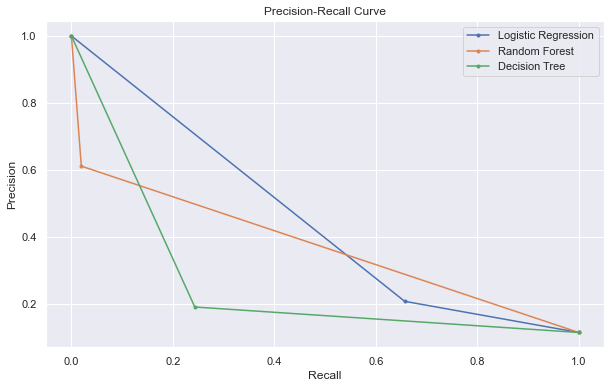

In [230]:
# Visualize precision-recall curve
modeling.visualize_precision_recall_curve(precision_logistic, recall_logistic, precision_rf, recall_rf, precision_dt, recall_dt)

Logistic Regression:


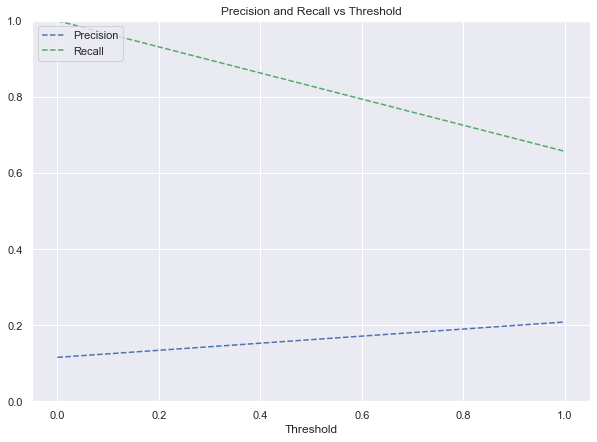

Random Forest:


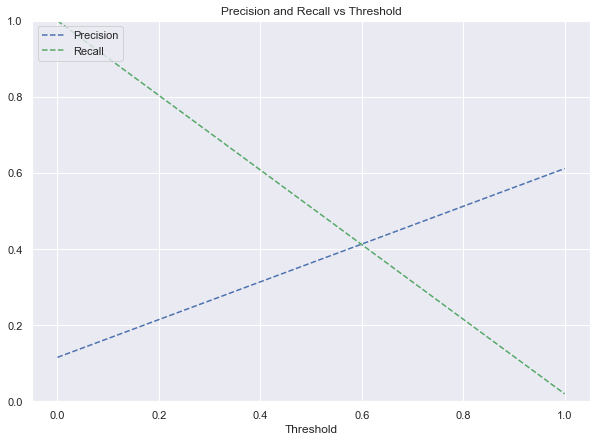

Decision Tree:


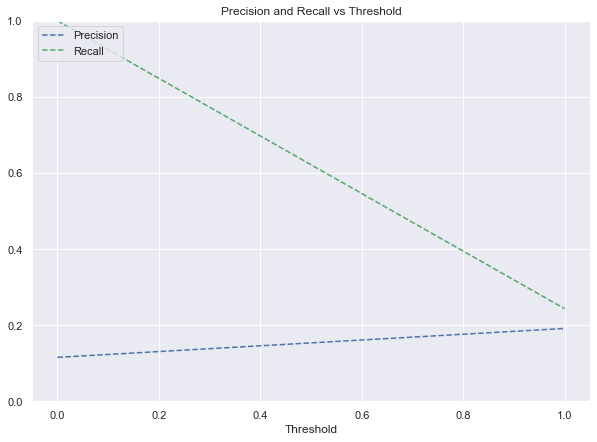

In [231]:
# Visualize precision and recall vs threshold for Logistic Regression
print("Logistic Regression:")
modeling.visualize_precision_recall_vs_threshold(precision_logistic, recall_logistic, thresholds_logistic)

# Visualize precision and recall vs threshold for Random Forest
print("Random Forest:")
modeling.visualize_precision_recall_vs_threshold(precision_rf, recall_rf, thresholds_rf)

# Visualize precision and recall vs threshold for Decision Tree
print("Decision Tree:")
modeling.visualize_precision_recall_vs_threshold(precision_dt, recall_dt, thresholds_dt)

In [232]:
# Compute recall scores
modeling.compute_recall_score(y_test)

------------Recall Score-----------
Recall (Logistic Regression): 0.6569491525423728
Recall (Random Forest): 0.019491525423728815
Recall (Decision Tree): 0.24322033898305084


In [233]:
# Compute F1 scores
modeling.compute_f1_score(y_test)

-------------F1 Score------------
F1 Score (Logistic Regression): 0.3164727495407226
F1 Score (Random Forest): 0.03777923784494087
F1 Score (Decision Tree): 0.21425905188503175


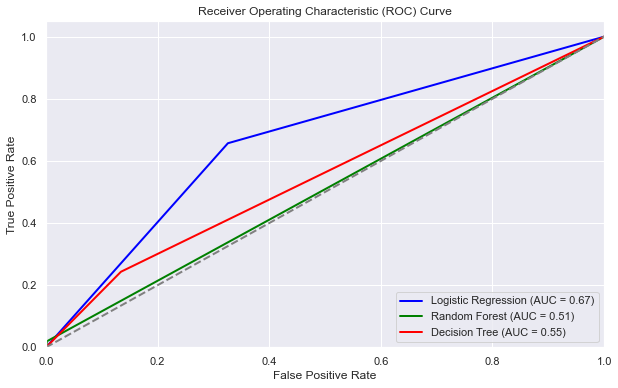

In [234]:
modeling.visualize_roc_curve(fpr_logistic, tpr_logistic, roc_auc_logistic, fpr_rf, tpr_rf, roc_auc_rf, fpr_dt, tpr_dt, roc_auc_dt)

According to the plot:
* Logistic Regression: 0.6655
* Random Forest: 0.5089
* Decision Tree: 0.5545

Logistic Regression shows the highest AUC, suggesting it performs better in distinguishing between defaults and non-defaults.



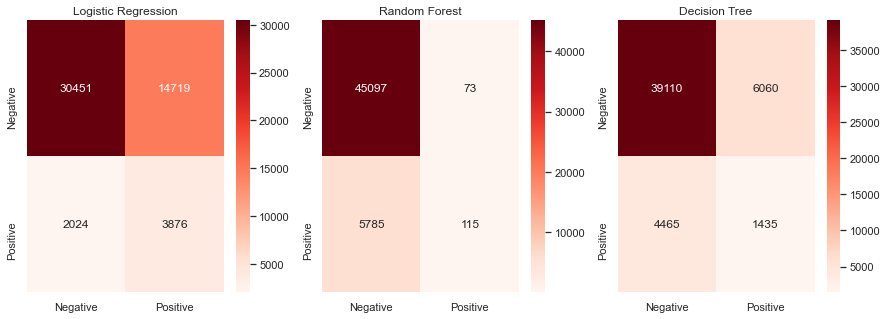

In [235]:
modeling.visualize_confusion_matrix(cm_logistic, cm_rf, cm_dt)

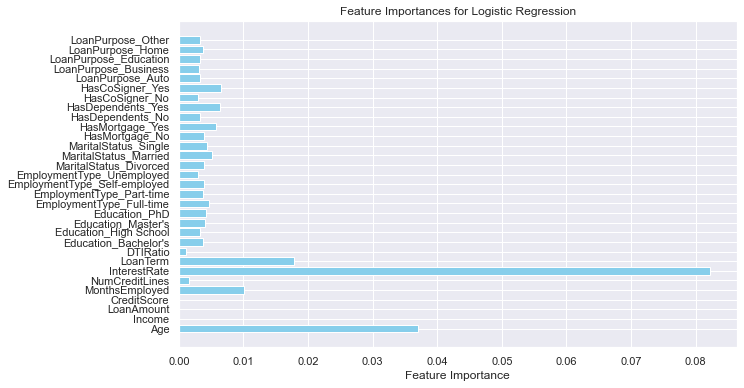

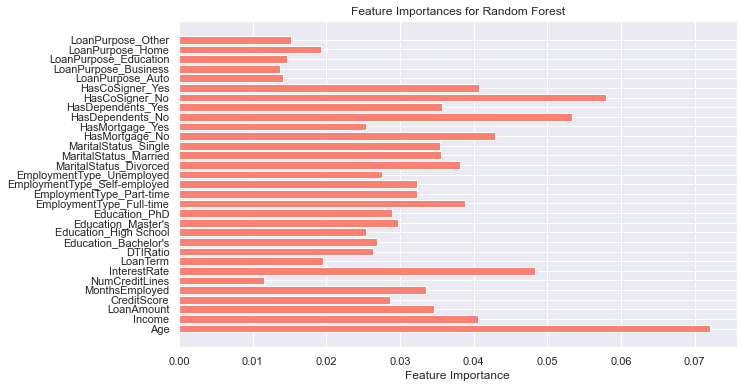

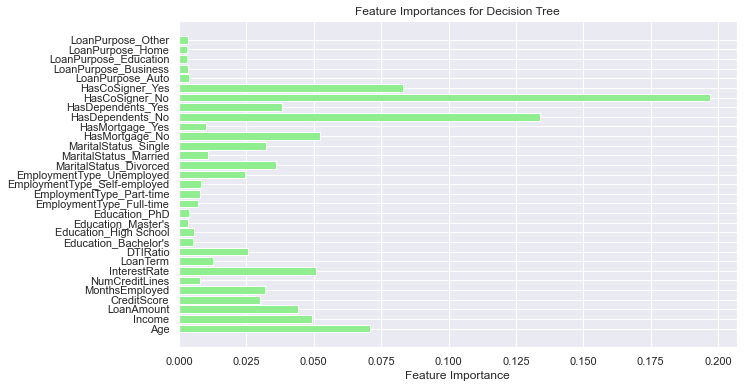

In [236]:
# Plot feature importances
modeling.plot_feature_importances(X_res)

In [195]:
# # Initialize the models
# logistic_model = LogisticRegression(random_state=42)
# rfc_model = RandomForestClassifier(random_state=42)
# dt_model = DecisionTreeClassifier(criterion='gini', random_state=1)

In [196]:
# # Fit the models
# logistic_model.fit(X_res, y_res)
# rfc_model.fit(X_res, y_res)
# dt_model.fit(X_res, y_res)

In [197]:
# # Evaluation metrics
# def metrics_score(y_true, y_pred):
#     cm = confusion_matrix(y_true, y_pred)
#     print("Accuracy Score:", accuracy_score(y_true, y_pred))
#     print("Confusion Matrix:\n", cm)
#     print("Classification Report:\n", classification_report(y_true, y_pred))
    
#     fpr, tpr, _ = roc_curve(y_true, y_pred)
#     roc_auc = auc(fpr, tpr)
#     print("AUC Score:", roc_auc)
    
#     plt.figure(figsize=(10, 6))
#     plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:0.2f})')
#     plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
#     plt.xlim([0.0, 1.0])
#     plt.ylim([0.0, 1.05])
#     plt.xlabel('False Positive Rate')
#     plt.ylabel('True Positive Rate')
#     plt.title('Receiver Operating Characteristic (ROC) Curve')
#     plt.legend(loc="lower right")
#     plt.grid(True)
#     plt.show()
    
#     # Visualize confusion matrix
#     sns.heatmap(cm, annot=True, fmt='d', cmap='Reds')
#     plt.xlabel('Predicted')
#     plt.ylabel('Actual')
#     plt.title('Confusion Matrix')
#     plt.show();
# #     precision, recall, _ = precision_recall_curve(y_true, y_pred)
# #     plt.plot(recall, precision, marker='.')
# #     plt.xlabel('Recall')
# #     plt.ylabel('Precision')
# #     plt.show();

In [198]:
# # Initialize the Logistic Regression model
# logistic_model = LogisticRegression()

# # Fit the model on the training data
# logistic_model.fit(X_res, y_res)

In [199]:
# # Predicting for test set
# y_pred = logistic_model.predict(X_test)

# # Performance on the test dataset
# metrics_score(y_test, y_pred)

**Observations:**

While the model achieves a commendable accuracy rate of around 88% on both training and testing datasets, its performance in identifying loan defaults (class 1) is subpar, with a recall of only about 1% on both sets.

This low recall suggests a significant difficulty in correctly flagging clients at risk of defaulting on their loans. Such limitations could potentially harm the bank's financial stability and profitability, as the model may overlook high-risk borrowers who require closer attention.

An analysis of the Confusion Matrix reveals a notable number of loan defaults being misclassified as non-defaults, indicating the model's insensitivity to genuine instances of loan default. This highlights the necessity for further refinement or exploration of alternative modeling approaches.

**Check the coefficients of the logistic regression model and examine the importance of variables**

In [154]:
# Get the coefficients of the logistic regression model
coefficients = logistic_model.coef_[0]

# Create a DataFrame to store feature names and their coefficients
feature_coefficients = pd.DataFrame({'Feature': X_res.columns, 'Coefficient': coefficients})

# Sort the DataFrame by coefficient values in descending order
feature_coefficients = feature_coefficients.sort_values(by='Coefficient', ascending=False)

# Display the top 10 features with the highest positive coefficients
print("Top 10 features with highest positive coefficients:")
feature_coefficients.head(10)

Top 10 features with highest positive coefficients:


,Feature,Coefficient
6,InterestRate,0.082279
7,LoanTerm,0.017837
8,DTIRatio,0.001183
3,CreditScore,0.000026
2,LoanAmount,0.000005
1,Income,-0.000006
5,NumCreditLines,-0.001600
16,EmploymentType_Unemployed,-0.003011
24,HasCoSigner_No,-0.003032
27,LoanPurpose_Business,-0.003082


**Positive Influencers on Loan Default:**

- `Interest Rate`: An increase in the interest rate correlates with a higher likelihood of loan default.
- `Loan Term`: Longer loan terms are associated with an increased risk of default.
- `Number of Credit Lines`: More credit lines indicate a higher probability of loan default.
- `No Co-Signer`: Clients without a co-signer tend to have a slightly elevated risk of default.
- `No Dependents`: Lack of dependents is marginally linked to a higher chance of default.

In [155]:
# Display the top 10 features with the lowest (most negative) coefficients
print("\nTop 10 features with highest negative coefficients:")
feature_coefficients.tail(10)


Top 10 features with highest negative coefficients:


,Feature,Coefficient
11,Education_Master's,-0.004095
12,Education_PhD,-0.004250
19,MaritalStatus_Single,-0.004293
13,EmploymentType_Full-time,-0.004710
18,MaritalStatus_Married,-0.005202
21,HasMortgage_Yes,-0.005802
23,HasDependents_Yes,-0.006354
25,HasCoSigner_Yes,-0.006510
4,MonthsEmployed,-0.010072
0,Age,-0.037106


**Negative Influencers on Loan Default:**

- `Age`: Older clients are less likely to default on loans.
- `PhD Education`: Having a Ph.D. is associated with a decreased risk of default.
- `Home Loan Purpose`: Loans taken for home-related purposes have a lower likelihood of default.
- `Mortgage`: Clients with a mortgage exhibit a lower risk of default.
- `Married Status`: Being married is correlated with a reduced risk of default.

**Conclusion of the logistic regression model**

- These coefficients reveal key insights into loan default patterns. Higher interest rates increase default odds by 3.2%, while older age decreases them by 4.1%.
- These findings have practical implications for our lending practices. By considering not only traditional metrics like credit scores but also demographic factors such as age, employment status, and interest rates, we can better assess the risk associated with each loan application. This, in turn, enables us to make more informed decisions about loan approvals and adjust lending policies to mitigate the risk of default.
- These insights underscore the importance of monitoring interest rate trends and adapting our lending strategies accordingly. For example, if interest rates are expected to rise, we may need to tighten our lending criteria or provide additional support to borrowers to help them manage their loan obligations effectively.

**Let's evaluate further**

#### 5.2 Random Classifier

This predicts the class labels randomly based on the distribution of the target classes in the training data. This means it assigns a class label (default or non-default) to each instance purely by chance, without considering any features.

In [156]:
# # Initialize the Random Forest Classifier model
# rfc_model = RandomForestClassifier(random_state=42)

# # Fit the model on the training data
# rfc_model.fit(X_res, y_res)

RandomForestClassifier(random_state=42)

Accuracy Score: 0.9999861514258492
Confusion Matrix:
 [[180524      0]
 [     5 180519]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    180524
           1       1.00      1.00      1.00    180524

    accuracy                           1.00    361048
   macro avg       1.00      1.00      1.00    361048
weighted avg       1.00      1.00      1.00    361048

AUC Score: 0.9999861514258492


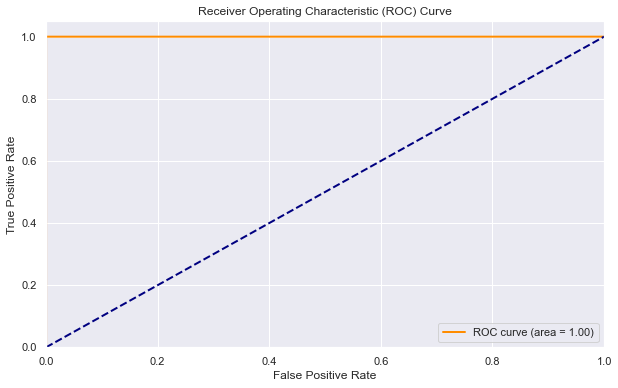

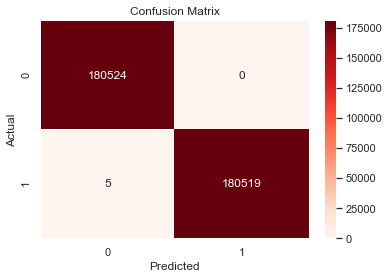

In [120]:
# # Predicting for train set
# rfc_y_pred = rfc_model.predict(X_res)

# # Performance on the train dataset
# metrics_score(y_res, rfc_y_pred)

Accuracy Score: 0.8852946935578617
Confusion Matrix:
 [[45097    73]
 [ 5785   115]]
Classification Report:
               precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.61      0.02      0.04      5900

    accuracy                           0.89     51070
   macro avg       0.75      0.51      0.49     51070
weighted avg       0.85      0.89      0.83     51070

AUC Score: 0.5089377042659932


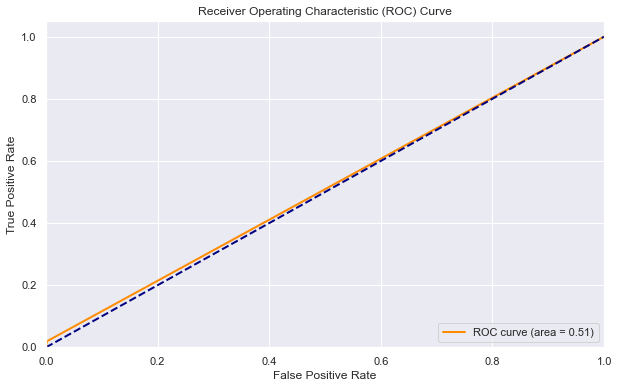

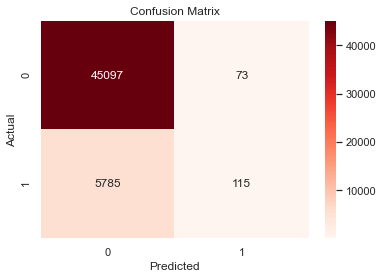

In [121]:
# # Predicting for test set
# rfc_y_pred_test = rfc_model.predict(X_test)

# # Performance on the test dataset
# metrics_score(y_test, rfc_y_pred_test)

##### Observations:
**Train data:**
- The Random Forest Classifier achieves an outstanding accuracy score of almost 100% on the train dataset. This suggests that the model has learned the patterns in the training data very well.
- Looking at the confusion matrix, we observe that there are only a few misclassifications, with almost all instances correctly classified.
- The precision, recall, and F1-score for both classes (0 and 1) are perfect, indicating that the model performs exceptionally well on the train dataset.

**Test data:**
- On the test dataset, the model achieves an accuracy score of approximately 88.65%, which is slightly lower than the accuracy on the train dataset but still quite high.
- The confusion matrix shows that there are some misclassifications, especially for class 1 (loan defaults), where the recall is only 3%. This suggests that the model struggles to correctly identify instances of loan defaults in the test dataset.
- The precision for class 1 is relatively low at 0.70, indicating that when the model predicts a loan default, it's correct around 70% of the time.
- The F1-score for class 1 is also low at 0.06, indicating poor performance in correctly classifying instances of loan defaults.

**Let's find the importance of features**

In [122]:
# Get feature importances
importances = rfc_model.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importances = pd.DataFrame({'Feature': X_res.columns, 'Importance': importances})

# Sort the DataFrame by importance values in descending order
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Display the top 10 features with the highest importance
print("Top 10 features with highest importance:")
feature_importances.head(10)

Top 10 features with highest importance:


,Feature,Importance
0,Age,0.072125
24,HasCoSigner_No,0.057929
22,HasDependents_No,0.053306
6,InterestRate,0.048374
20,HasMortgage_No,0.042936
25,HasCoSigner_Yes,0.040782
1,Income,0.040645
13,EmploymentType_Full-time,0.038831
17,MaritalStatus_Divorced,0.038174
23,HasDependents_Yes,0.035674


In [123]:
# Display the top 10 features with the highest importance
print("Top 10 features with lowest importance:")
feature_importances.tail(10)

Top 10 features with lowest importance:


,Feature,Importance
8,DTIRatio,0.026385
21,HasMortgage_Yes,0.025463
10,Education_High School,0.025436
7,LoanTerm,0.019546
29,LoanPurpose_Home,0.019323
30,LoanPurpose_Other,0.015207
28,LoanPurpose_Education,0.014632
26,LoanPurpose_Auto,0.014086
27,LoanPurpose_Business,0.013776
5,NumCreditLines,0.011584


#### Insights
**Most Important Feature:**
- `Income`: This indicates the borrower's financial capacity to repay loans. Higher income levels generally correlate with lower default risk, as borrowers have more resources to meet their financial obligations.

**Least Important Feature:**
- `HasCoSigner (Yes/No)`: Whether the loan has a co-signer or not. While having a co-signer can potentially enhance the borrower's creditworthiness, it appears to have the least impact on default risk compared to other factors considered in the mo

In [160]:
dt_model = DecisionTreeClassifier(criterion='gini', random_state=1)
dt_model.fit(X_res, y_res)

DecisionTreeClassifier(random_state=1)

Accuracy Score: 1.0
Confusion Matrix:
 [[180524      0]
 [     0 180524]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00    180524
           1       1.00      1.00      1.00    180524

    accuracy                           1.00    361048
   macro avg       1.00      1.00      1.00    361048
weighted avg       1.00      1.00      1.00    361048

AUC Score: 1.0


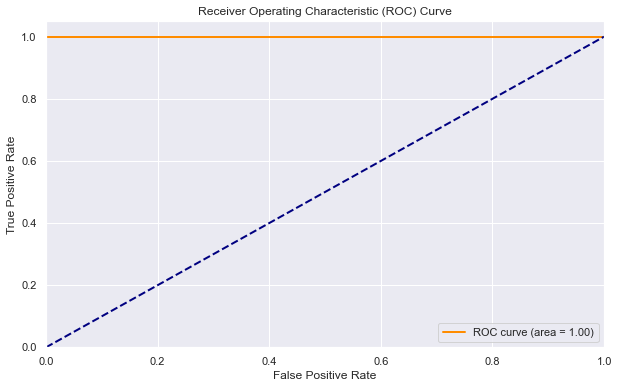

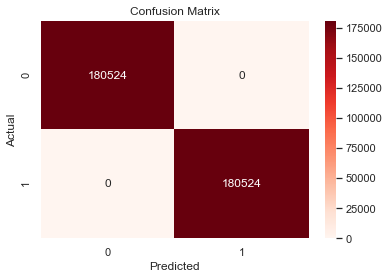

In [162]:
y_res_pred = dt_model.predict(X_res)
metrics_score(y_res, y_res_pred)

Accuracy Score: 0.793910319169767
Confusion Matrix:
 [[39110  6060]
 [ 4465  1435]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.87      0.88     45170
           1       0.19      0.24      0.21      5900

    accuracy                           0.79     51070
   macro avg       0.54      0.55      0.55     51070
weighted avg       0.82      0.79      0.80     51070

AUC Score: 0.5545302491904407


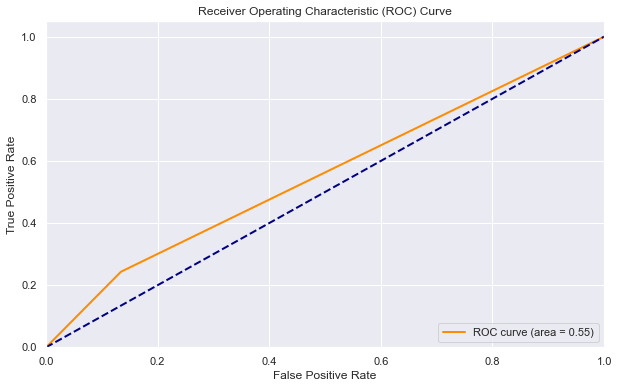

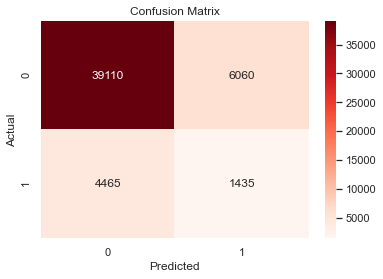

In [161]:
y_pred = dt_model.predict(X_test)

metrics_score(y_test, y_pred)

#### Short Summay
While the logistic regression model offers better interpretability and performance in identifying non-default cases, the Random Forest Classifier demonstrates superior performance in identifying default cases, albeit with a higher risk of overfitting. To leverage the strengths of the Random Forest Classifier further, our next step involves fine-tuning its hyperparameters.By optimizing parameters such as the number of trees, maximum depth, and minimum samples per leaf, we aim to enhance its predictive power while mitigating overfitting risks.

## 6. Hyperparameter Tuning
---
Here, we are going to optimize the hyperparameters of the RandomClassifier using techniques like Grid Search to enhance its performance. We'll fine-tune the model to achieve better predictive accuracy.

In [37]:
# Define hyperparameters
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}


In [39]:
# Instantiate the model
rfc_model = RandomForestClassifier(random_state=42)

# Instantiate the GridSearchCV object
rfc_tuned = GridSearchCV(rfc_model, param_grid, scoring='accuracy', cv=5)

In [ ]:
# Fit the model
rfc_tuned.fit(X_train, y_train)

In [ ]:
# best parameters
best_params = rfc_tuned.best_params_
print("Best Parameters:", best_params)

In [ ]:
# Evaluate model performance
test_accuracy = rfc_tuned.best_score_
print("Test Accuracy:", test_accuracy)

In [ ]:
# Visualize results
cv_results = rfc_tuned.cv_results_

In [ ]:
# def apply_smote(self, X_train, y_train,sampling_strategy=0.75, k_neighbors=5, random_state= None):
#         smote = SMOTE(sampling_strategy=sampling_strategy, k_neighbors=k_neighbors, random_state=random_state)
#         X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

#         return X_train_resampled, y_train_resampled
    

In [106]:
# def scale_numerical(df):
#     # Initialize StandardScaler
#     scaler = StandardScaler()
    
#     # Scale numerical columns
#     numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
#     df[numerical_cols] = scaler.fit_transform(df[numerical_cols])
    
#     return df

# # Scale numerical features in loan_df_encoded
# loan_df_scaled = scale_numerical(loan_df_encoded)
# loan_df_scaled


## Feature Engineering

Create new features from existing ones to potentially improve model performance. This could involve transformations, interactions, or deriving new variables based on domain knowledge.

## Model Building

Train and evaluate different machine learning algorithms for loan default prediction. Start with a simple, interpretable baseline model (e.g., logistic regression), then explore more complex models (e.g., random forest, XGBoost). Evaluate each model's performance using appropriate classification metrics such as accuracy, precision, recall, F1-score, and AUC-ROC.

## Hyperparameter Tuning

Optimize the hyperparameters of the chosen models using techniques like Grid Search and Random Search to enhance their performance. Fine-tune the models to achieve better predictive accuracy.

## Model Evaluation

Assess the performance of the tuned models using cross-validation and a holdout test set. Compare the performance of different models and select the best-performing one based on the evaluation metrics.

## Conclusion

Summarize the findings from the analysis, discuss the implications for financial institutions, and suggest areas for future work. Reflect on the limitations of the study and potential ways to address them in future analyses.
